# Population by commune

In [1]:
from pynsee.geodata import get_geodata_list, get_geodata

import math
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout,
                    level=logging.INFO, 
                    format="%(message)s")

In [2]:
# get geographical data list
geodata_list = get_geodata_list()
# get departments geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune').to_crs("EPSG:3035")

In [8]:
com["area"] = com['geometry'].area / 10**6
mapcom = com.to_crs(epsg=3857)

mapcom['REF_AREA'] = 'D' + mapcom['insee_dep']
mapcom['density'] = mapcom['population'] / mapcom['area'] 

In [9]:
mapcom = mapcom.transform_overseas(
    departement=['971', '972', '974', '973', '976'],  factor=[1.5, 1.5, 1.5, 0.6, 1.5])

In [10]:
mapcom = mapcom.zoom(departement = ["75","92", "93", "91", "77", "78", "95", "94"],
                     factor=1.5, startAngle = math.pi * (1 - 3 * 1/9))
mapcom

,geometry,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,area,REF_AREA,density
0,"MULTIPOLYGON (((642951.492 6064264.529, 642997...",COMMUNE_0000000009743136,Cintrey,CINTREY,70153,Commune simple,96,05,2,70,27,200036150,6.219481,D70,15.435372
1,"MULTIPOLYGON (((465332.276 5718696.781, 465536...",COMMUNE_0000000009752559,Boisset-lès-Montrond,BOISSET-LES-MONTROND,42020,Commune simple,1199,01,1,42,84,200065886,8.259823,D42,145.160501
2,"MULTIPOLYGON (((-192846.05 6042282.823, -19288...",COMMUNE_0000000009744026,Conquereuil,CONQUEREUIL,44044,Commune simple,1077,08,5,44,52,243500741,32.996579,D44,32.639747
3,"MULTIPOLYGON (((494772.802 5963521.594, 494776...",COMMUNE_0000000009746526,Arnay-le-Duc,ARNAY-LE-DUC,21023,Commune simple,1370,01,1,21,27,200071173,12.026203,D21,113.917921
4,"MULTIPOLYGON (((685246.97 5729648.856, 685518....",COMMUNE_0000000009752217,La Compôte,LA COMPOTE,73090,Commune simple,264,16,2,73,84,200069110,7.521134,D73,35.101091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36197,"MULTIPOLYGON (((-392093.741 6620836.499, -3920...",COMMUNE_0000000009734991,Chambry,CHAMBRY,77077,Commune simple,1038,03,1,77,11,200072130,9.747580,D77,106.487970
36198,"MULTIPOLYGON (((-401992.576 6586663.182, -4022...",COMMUNE_0000000009735992,Couilly-Pont-aux-Dames,COUILLY-PONT-AUX-DAMES,77128,Commune simple,2100,21,1,77,11,200090504,4.722805,D77,444.651038
36199,"MULTIPOLYGON (((-403535.518 6469384.993, -4039...",COMMUNE_0000000009739716,Machault,MACHAULT,77266,Commune simple,786,14,2,77,11,200070779,16.278715,D77,48.283910
36200,"MULTIPOLYGON (((-472335.189 6437945.993, -4724...",COMMUNE_0000000009740532,Nanteau-sur-Essonne,NANTEAU-SUR-ESSONNE,77328,Commune simple,407,07,4,77,11,200023240,12.904902,D77,31.538402


In [6]:
mapcom.loc[mapcom.density < 40, 'range'] = "< 40"
mapcom.loc[mapcom.density >= 20000, 'range'] = "> 20 000"

density_ranges = [40, 80, 100, 120, 150, 200, 250, 400, 600, 1000, 2000, 5000, 10000, 20000]
list_ranges = []
list_ranges.append( "< 40")

for i in range(len(density_ranges)-1):
    min_range = density_ranges[i]
    max_range = density_ranges[i+1]
    range_string = "[{}, {}[".format(min_range, max_range)
    mapcom.loc[(mapcom.density >= min_range) & (mapcom.density < max_range), 'range'] = range_string
    list_ranges.append(range_string)

list_ranges.append("> 20 000")

mapcom['range'] = mapcom['range'].astype(CategoricalDtype(categories=list_ranges, ordered=True))  

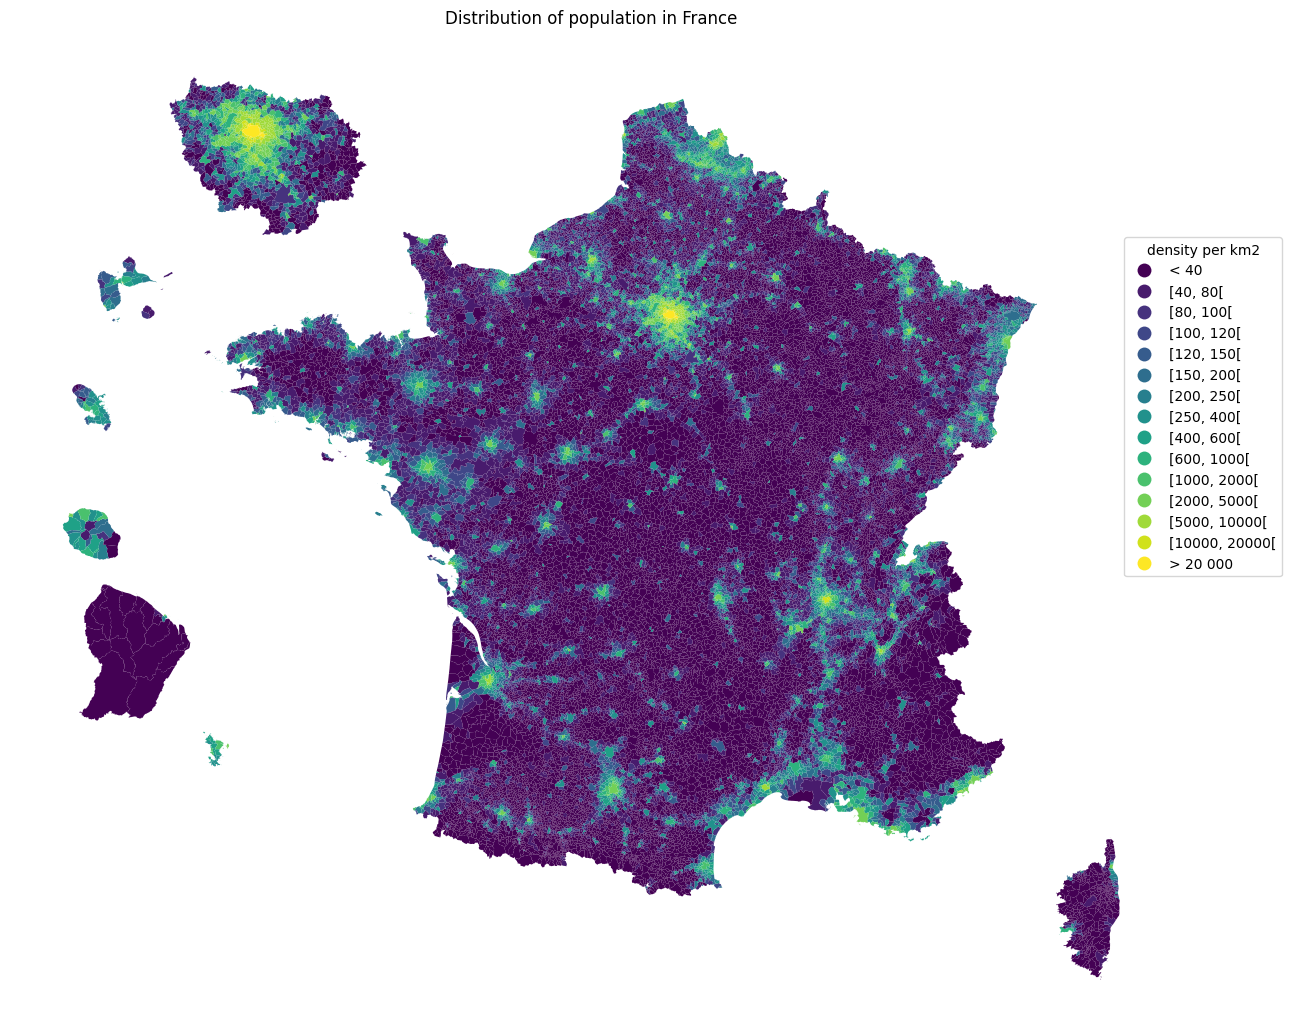

In [7]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
mapcom.plot(column='range', cmap=cm.viridis,
    legend=True, ax=ax,
    legend_kwds={'bbox_to_anchor': (1.1, 0.8),
                 'title':'density per km2'})
ax.set_axis_off()
ax.set(title='Distribution of population in France')
plt.show()

fig.savefig('pop_france.svg',
            format='svg', dpi=1200,
            bbox_inches = 'tight',
            pad_inches = 0)